In [1]:
import Functions as func
import SimModel
import matplotlib.pyplot as plt
import Agent
import numpy as np

In [2]:
datafcr, dataafrr, datamfrr, datalastprofile, pvdata, pricedata = func.getdata('08-02','08-21')

# agent = Agent.Agentoptimizevalue()
# agent = Agent.Agentoccupancyrate(100)
# agent = Agent.Agentnopv()
# agent = Agent.Agentmanualinput()
# agent = Agent.Agentoptimizevalocc(100)
agent = Agent.Agenttest()

lastprofile = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
model = SimModel.Model(datalastprofile, lastprofile, dataafrr, datafcr, pricedata, pvdata, 6, 5, 100, agent)


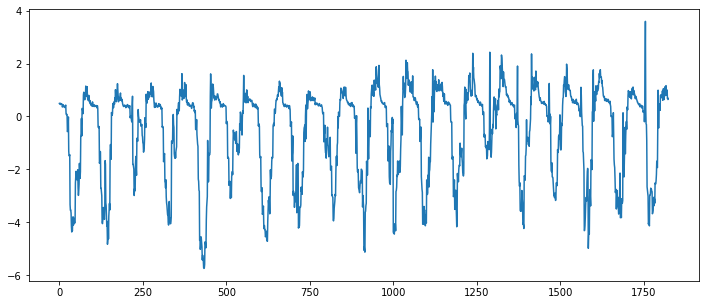

In [3]:
dataerror = model.logdata['netenergydemand']
plt.figure(figsize=(12, 5))
dataerror.plot()

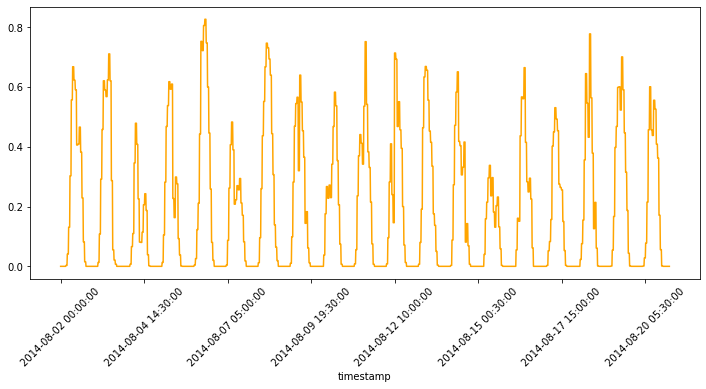

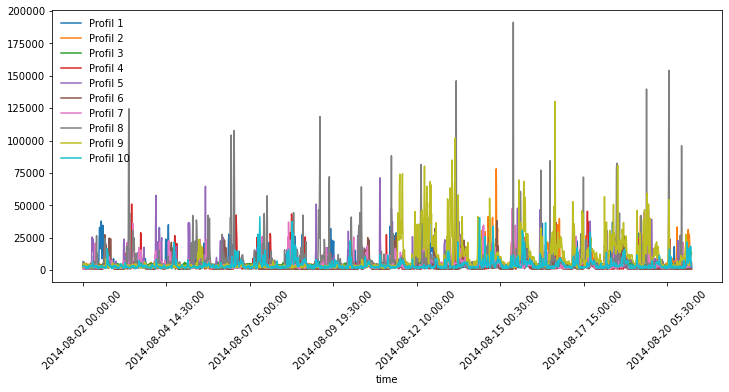

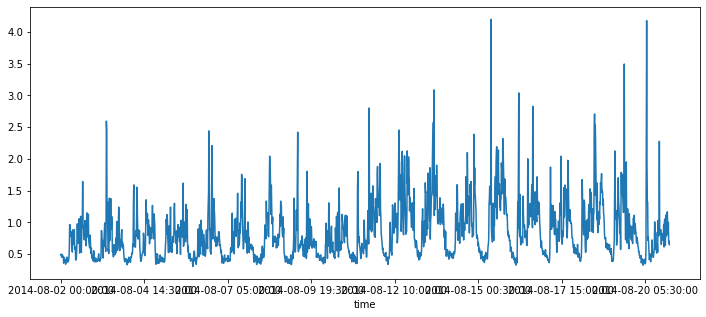

In [4]:
func.plotpvdata(pvdata)
func.plotlastprofiledata(datalastprofile, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
plt.figure(figsize=(12, 5))
datalastprofile['Summe'].plot()

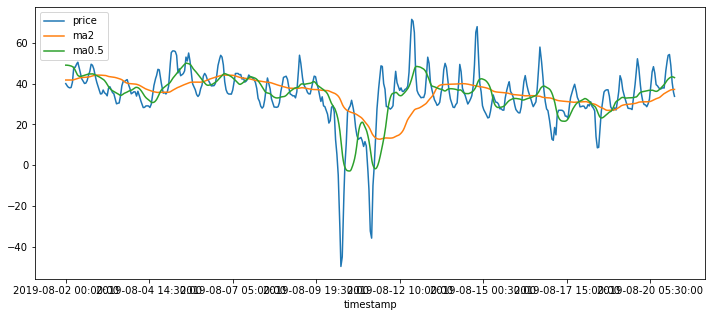

In [5]:
plt.figure(figsize=(12, 5))
pricedata['price'].plot(label='price')
pricedata['ma2'].plot(label='ma2')
pricedata['ma0.5'].plot(label='ma0.5')
plt.legend()
plt.show()

In [6]:
model.def_noise("perlin", 0.5, 0.2, 0.5, 0.2, model.logdata)

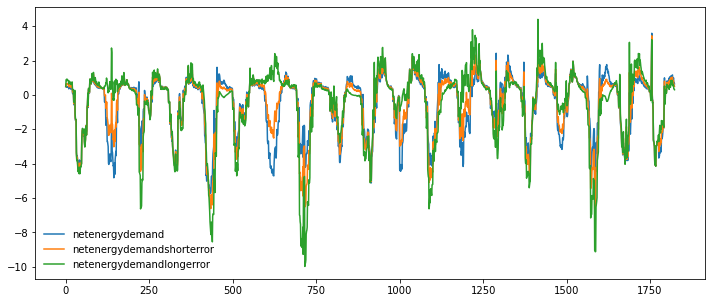

In [7]:
func.plot_error(model.logdata)

In [8]:
model.run(showprogress = True, ignoreprldecision=False, ignoresrldecision=False, runwithnoise=False)
model.cutlogdatei()
data = model.evaluaterevenuestream()

Progress: 0%
Progress: 9%
Progress: 19%
Progress: 29%
Progress: 39%
Progress: 49%
Progress: 59%
Progress: 69%
Progress: 79%
Progress: 89%
Progress: 99%


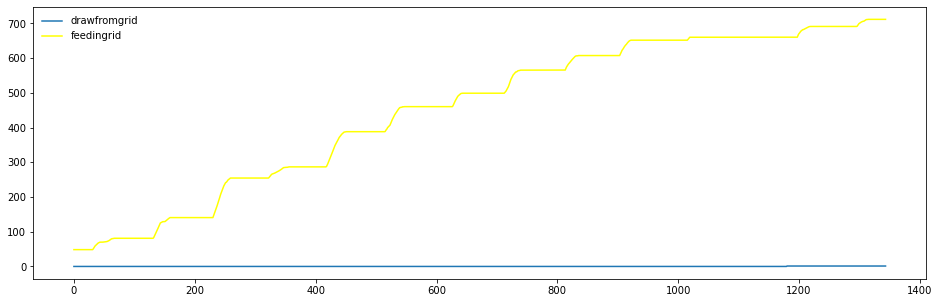

In [9]:
plt.figure(figsize=(16, 5))
cumsumdatadraw = model.logdata['drawfromgrid'].cumsum()
cumsumdatafeed = model.logdata['feedingrid'].cumsum()
cumsumdatadraw.plot()
cumsumdatafeed.plot(color = 'yellow')
plt.legend(loc='upper left', frameon=False)

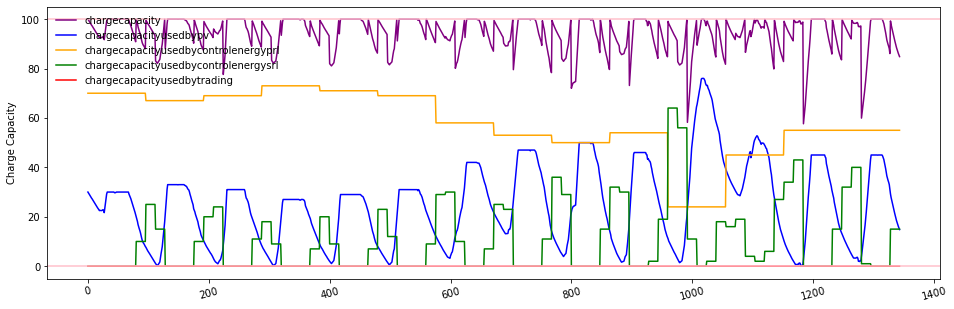

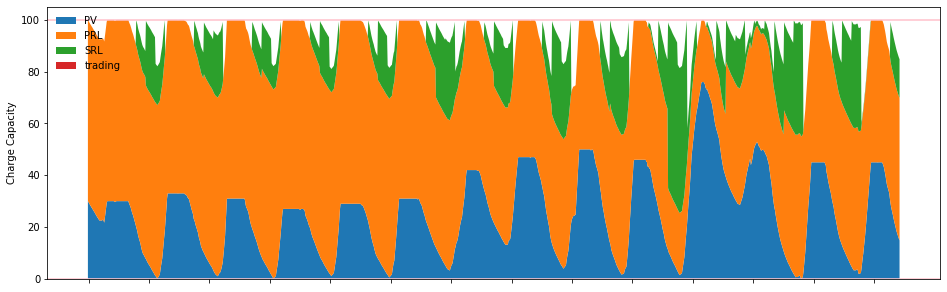

In [10]:
func.plotchargecapacity(model)

In [11]:
model.logdata.to_csv('test.csv')

In [12]:
model.pricedata.to_csv('test.csv')

In [13]:
data

[340.70021500000007,
 4.447695,
 71.15905833333333,
 23.913760000000007,
 327.08194,
 0,
 767.3026683333335]

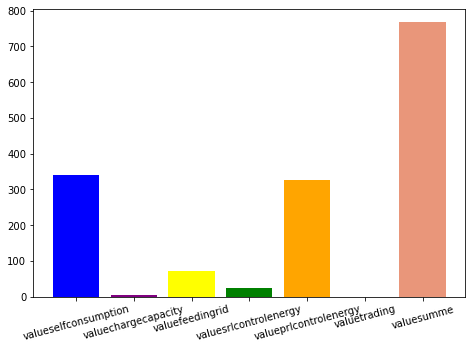

767.3026683333335

In [16]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['valueselfconsumption', 'valuechargecapacity', 'valuefeedingrid', 'valuesrlcontrolenergy', 'valueprlcontrolenergy', 'valuetrading', 'valuesumme']
#data = model.evaluaterevenuestream()
ax.bar(langs,data, color = ['blue', 'purple', 'yellow', 'green', 'orange', 'red', 'darksalmon'])
plt.xticks(rotation=15)
plt.show()
data[6]

In [15]:
# model.logdata = model.logdata.set_index('timestamp')